In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [24]:
def show(img):
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

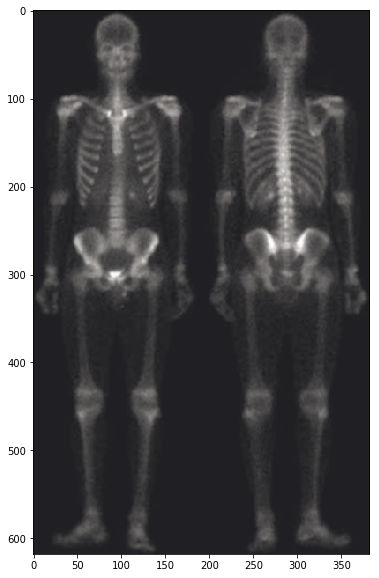

In [25]:
image = cv2.imread("skeleton2.png")
show(image)

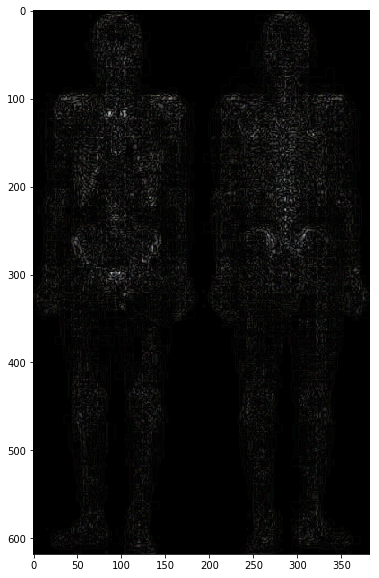

In [26]:
img2 = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
img2 = cv2.convertScaleAbs(img2)
show(img2)

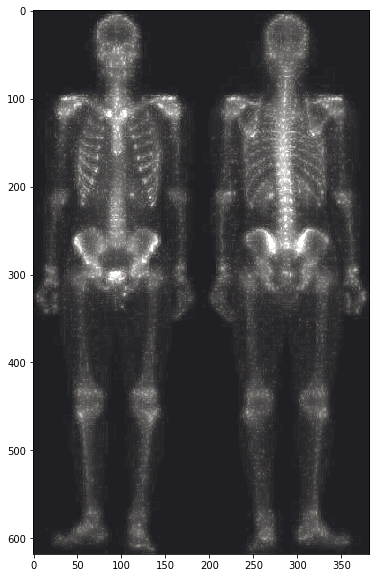

In [27]:
img3 = cv2.add(image, img2)
show(img3)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


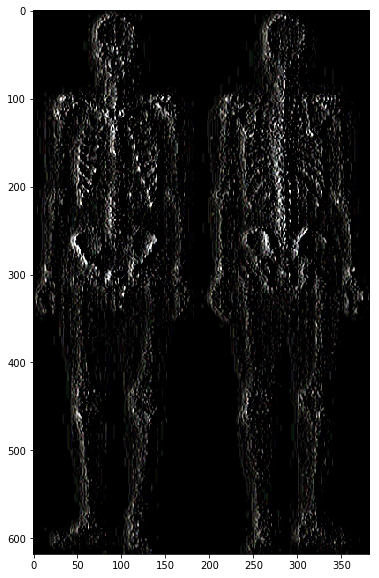

In [44]:
# img4 = cv2.Sobel(img3, cv2.CV_32F, 1, 0)
# img4 = cv2.convertScaleAbs(img4)
# show(img4)

# grad_x = cv2.Sobel(img3, cv2.CV_32F, 1, 0, ksize=3)
# grad_x = cv2.convertScaleAbs(grad_x)
# grad_y = cv2.Sobel(img3, cv2.CV_32F, 0, 1, ksize=3)
# grad_y = cv2.convertScaleAbs(grad_y)
# img4 = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
# show(img4)

kernel = np.zeros((3,3))
# option 1
# kernel[0][0] = -1
# kernel[0][1] = -2
# kernel[0][2] = -1
# kernel[2][0] = 1
# kernel[2][1] = 2
# kernel[2][2] = 1

#option 2
kernel[0][0] = -1
kernel[0][2] = 1
kernel[1][0] = -2
kernel[1][2] = 2
kernel[2][0] = -1
kernel[2][2] = 1


print(kernel)

img4 = cv2.filter2D(img3,-1, kernel)
show(img4)

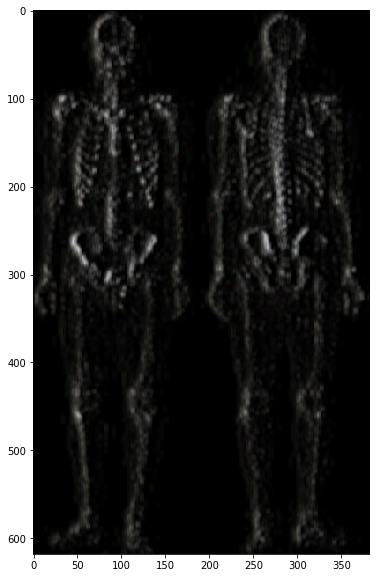

In [45]:
kernel = np.ones((5,5), np.float32)/25
img5 = cv2.filter2D(img4, -1, kernel)
show(img5)

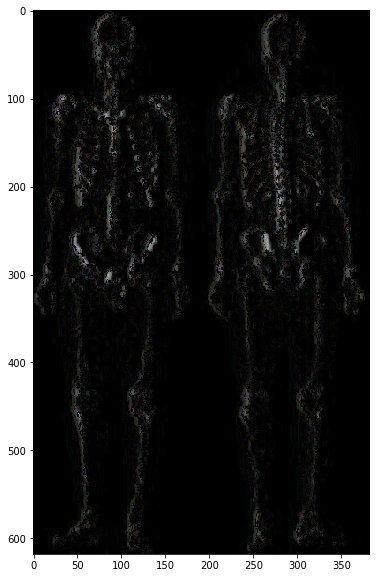

In [46]:
img6 = cv2.bitwise_and(img3, img5)
show(img6)

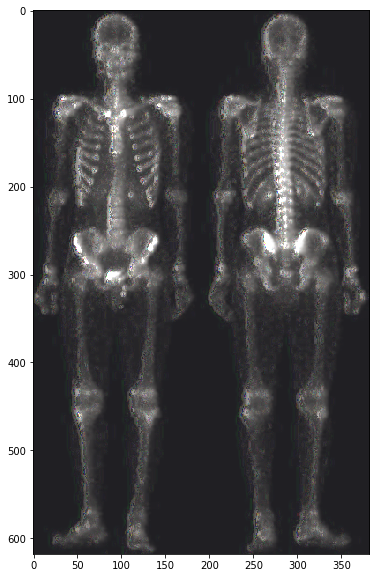

In [47]:
img7 = cv2.add(image, img6)
show(img7)

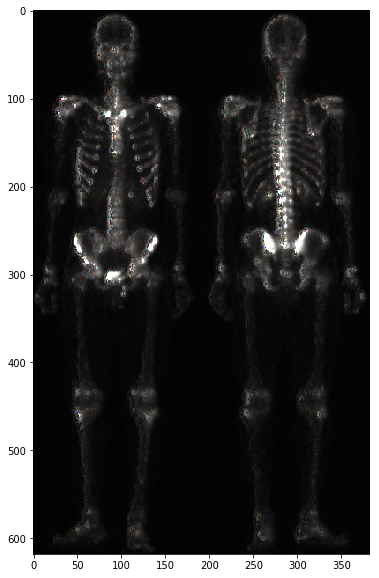

In [49]:
gamma = 1 / 0.5
# img8 = img7
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
img8 = cv2.LUT(img7, table)
show(img8)